#Experiment 11 - Random Forest as Bagging ensemble techniqe

Random Forest is a machine learning algorithm that uses many decision trees to make better predictions. Each tree looks at different random parts of the data and their results are combined by voting for classification or averaging for regression which makes it as ensemble learning technique

In [16]:
import pandas as pd;

#Loading the Dataset

In [19]:
df=pd.read_csv("/content/creditcard.csv")

In [20]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


#Data preprocessing

In [21]:
df.shape

(140703, 31)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140703 entries, 0 to 140702
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    140703 non-null  int64  
 1   V1      140703 non-null  float64
 2   V2      140703 non-null  float64
 3   V3      140703 non-null  float64
 4   V4      140703 non-null  float64
 5   V5      140702 non-null  float64
 6   V6      140702 non-null  float64
 7   V7      140702 non-null  float64
 8   V8      140702 non-null  float64
 9   V9      140702 non-null  float64
 10  V10     140702 non-null  float64
 11  V11     140702 non-null  float64
 12  V12     140702 non-null  float64
 13  V13     140702 non-null  float64
 14  V14     140702 non-null  float64
 15  V15     140702 non-null  float64
 16  V16     140702 non-null  float64
 17  V17     140702 non-null  float64
 18  V18     140702 non-null  float64
 19  V19     140702 non-null  float64
 20  V20     140702 non-null  float64
 21  V21     14

In [23]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,140703.000000,140703.000000,140703.000000,140703.000000,140703.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,...,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000
mean,52017.063240,-0.249590,0.018631,0.672709,0.139629,-0.282394,0.079221,-0.117074,0.065108,-0.092798,...,-0.039490,-0.118699,-0.033307,0.011971,0.130149,0.023568,0.000598,0.002314,91.113847,0.001876
std,20935.874366,1.815360,1.612924,1.267514,1.321903,1.306687,1.283716,1.166104,1.230387,1.088043,...,0.721606,0.635249,0.591371,0.595799,0.437282,0.491940,0.388942,0.306960,247.063579,0.043276
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,38001.000000,-1.020857,-0.563417,0.169911,-0.713458,-0.903456,-0.661857,-0.603665,-0.130976,-0.714885,...,-0.226122,-0.548084,-0.171745,-0.325037,-0.136357,-0.326105,-0.060363,-0.004166,6.000000,0.000000
50%,53833.000000,-0.270868,0.105003,0.750128,0.167426,-0.314577,-0.176481,-0.064121,0.080542,-0.155239,...,-0.059815,-0.095822,-0.044999,0.068728,0.166478,-0.064879,0.011792,0.023610,23.900000,0.000000
75%,69573.000000,1.157957,0.777163,1.362846,0.992618,0.237702,0.465523,0.409937,0.375410,0.481411,...,0.113589,0.300817,0.083280,0.408711,0.418682,0.286656,0.087069,0.077145,80.910000,0.000000
max,83879.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [24]:
df.nunique()
#it checks the number of unique values

,0
Time,60519
V1,136354
V2,136354
V3,136354
V4,136354
V5,136353
V6,136353
V7,136353
V8,136353
V9,136353


In [25]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,1
V6,1
V7,1
V8,1
V9,1


In [26]:
df.isnull().sum().any()

np.True_

In [27]:
df.duplicated().sum()

np.int64(529)

#Selecting the independent and dependent variables

In [28]:
X=df.drop('Class',axis=1)
y=df['Class']

In [29]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [30]:
y.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


#Train-test split

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest cannot handle missing values, it fills the missing values (NaN) with the median of the column

In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

#Scaling of the data

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [46]:
print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (112562, 30)
Testing size: (28141, 30)


#Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Data Visulization

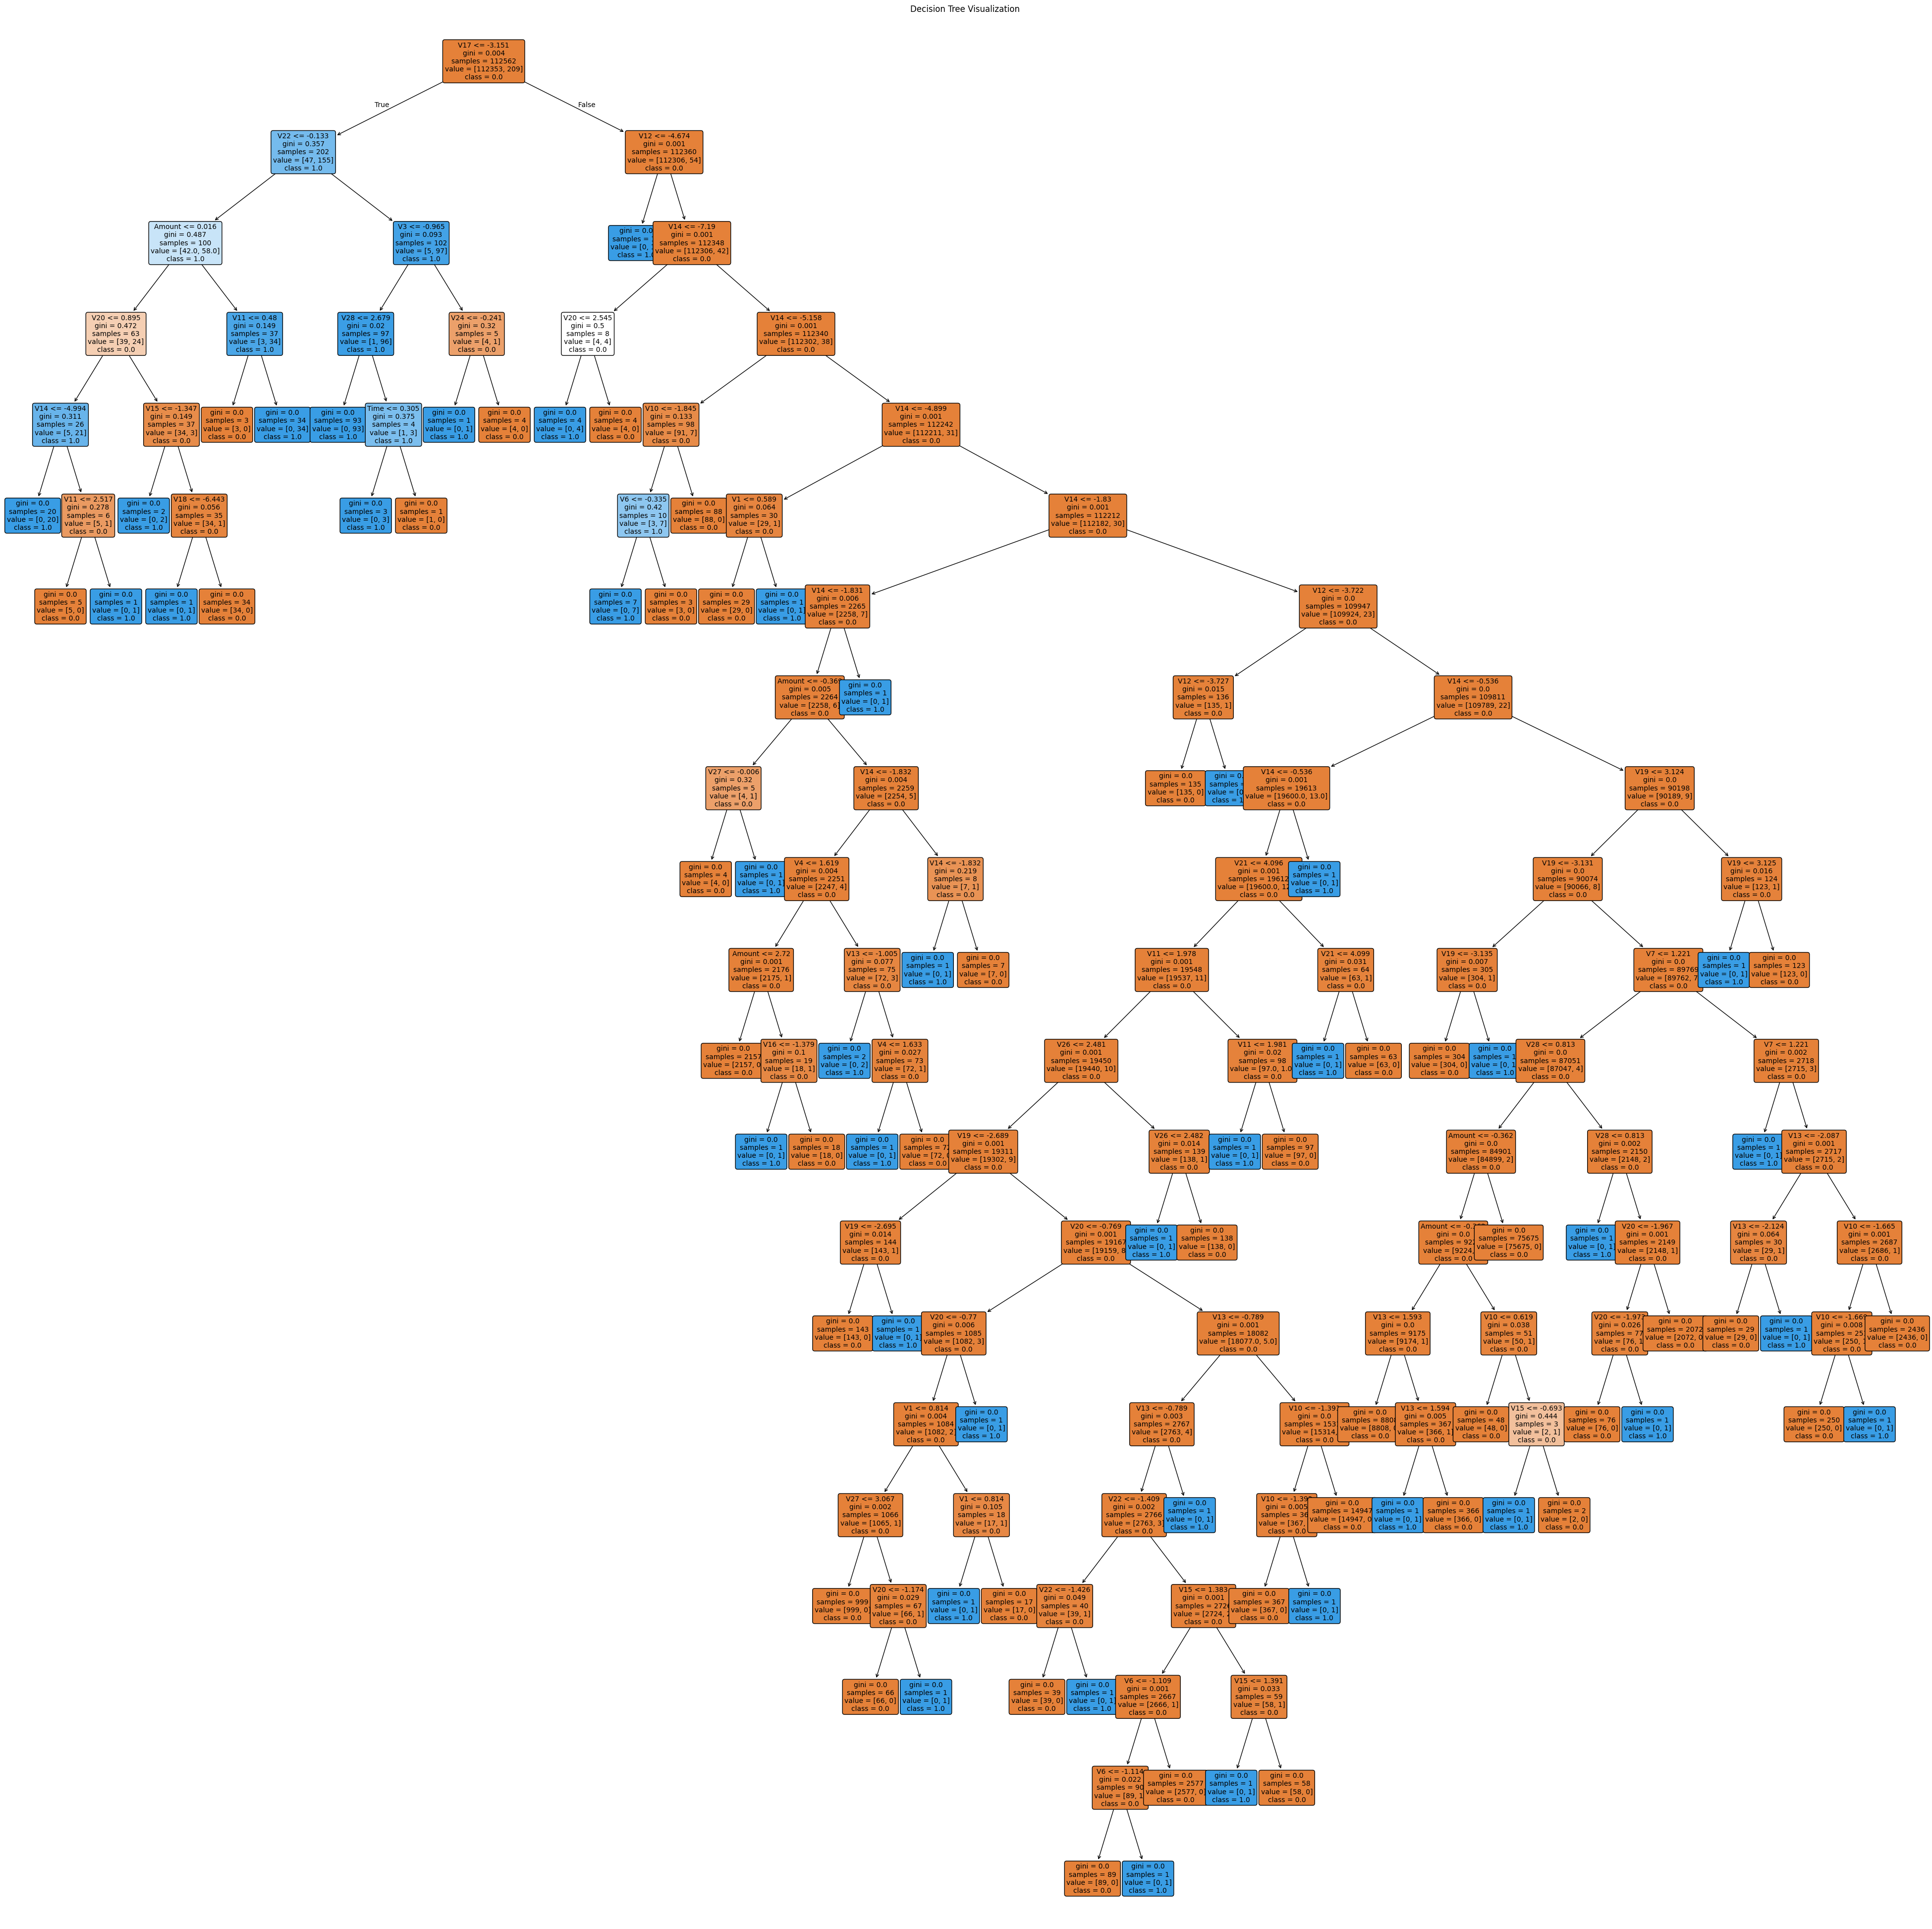

In [54]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))  # Bigger figure for readability
plot_tree(model,
          filled=True,              # Fill colors based on class
          feature_names=X.columns,  # Column names
          class_names=[str(c) for c in y.unique()],  # Class labels
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()